# Исследования базы данных и ответы на интересующие вопросы

Цели исследования:  
    найти ответы на заданные вопросы в ТЗ

Вопросы:

Посчитайте, сколько книг вышло после 1 января 2000 года;  
Для каждой книги посчитайте количество обзоров и среднюю оценку;  
50 страниц — так вы исключите из анализа брошюры;  
Определите автора с самой высокой средней оценкой книг — учитывайте
только книги с 50 и более оценками;  
Посчитайте среднее количество обзоров от пользователей, которые поставили
больше 48 оценок.  

## Описание данных

Таблица **books**   
Содержит данные о книгах:   
`book_id` — идентификатор книги;   
`author_id` — идентификатор автора;   
`title` — название книги;   
`num_pages` — количество страниц;   
`publication_date` — дата публикации книги;   
`publisher_id` — идентификатор издателя.   
   
Таблица **authors**   
Содержит данные об авторах:   
`author_id` — идентификатор автора;   
`author` — имя автора.   
   
Таблица **publishers**   
Содержит данные об издательствах:   
`publisher_id` — идентификатор издательства;   
`publisher` — название издательства;   
   
Таблица **ratings**   
Содержит данные о пользовательских оценках книг:   
`rating_id` — идентификатор оценки;   
`username` — имя пользователя, оставившего оценку;   
`rating` — оценка книги.   
   
Таблица **reviews**   
Содержит данные о пользовательских обзорах на книги:   
`review_id` — идентификатор обзора;   
`book_id` — идентификатор книги;   
`username` — имя пользователя, написавшего обзор;   
`text` — текст обзора.

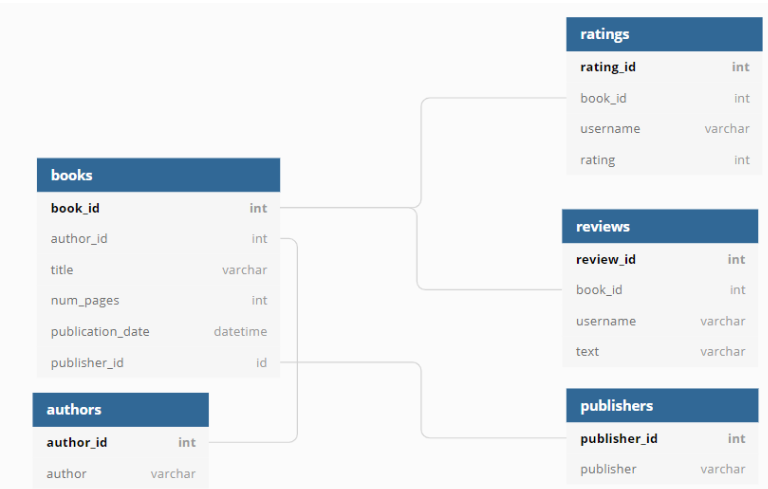

In [2]:
import pandas as pd
from sqlalchemy import text, create_engine

In [3]:
db_config = {'user': 'praktikum_student', 
             'pwd': 'Sdf4$2;d-d30pp', 
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, 
             'db': 'data-analyst-final-project-db'
}

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

engine = create_engine(connection_string, connect_args={'sslmode':'require'})
con=engine.connect()

In [4]:
# проверка подключения
query = '''SELECT * 
           FROM books 
           LIMIT 10
        '''
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


## Вопрос 1
Посчитайте, сколько книг вышло после 1 января 2000 года  

In [5]:
query = '''SELECT COUNT(DISTINCT book_id) "количество книг"
           FROM books 
           WHERE publication_date > '2000-01-01' 
        '''
pd.io.sql.read_sql(sql=text(query), con = con)

,количество книг
0,819


после 1 января 2000 года вышло 819 книг исходя из данных в  БД

## Вопрос 2
Для каждой книги посчитайте количество обзоров и среднюю оценку    

In [6]:
query = '''SELECT title "название книги", 
                  review_cnt "количество обзоров",  
                  ROUND(avg_rating,2) "средний рейтинг"
           FROM books b
               LEFT JOIN (SELECT book_id, 
                                 COUNT(review_id) "review_cnt"
                          FROM reviews 
                          GROUP BY 1) rating_agg USING(book_id)
               LEFT JOIN (SELECT book_id,
                                 AVG(rating) "avg_rating"
                          FROM ratings
                          GROUP BY 1) rewiew_agg USING(book_id)
            
        '''
question_2 = pd.io.sql.read_sql(sql=text(query), con = con)
question_2

,название книги,количество обзоров,средний рейтинг
0,The Body in the Library (Miss Marple #3),2.0,4.50
1,Galápagos,2.0,4.50
2,A Tree Grows in Brooklyn,5.0,4.25
3,Undaunted Courage: The Pioneering First Missio...,2.0,4.00
4,The Prophet,4.0,4.29
...,...,...,...
995,Alice in Wonderland,4.0,4.23
996,A Woman of Substance (Emma Harte Saga #1),2.0,5.00
997,Christine,3.0,3.43
998,The Magicians' Guild (Black Magician Trilogy #1),2.0,3.50


In [7]:
question_2.describe()

,количество обзоров,средний рейтинг
count,994.000000,1000.000000
mean,2.809859,3.899040
std,1.055873,0.562388
min,1.000000,1.500000
25%,2.000000,3.500000
50%,3.000000,4.000000
75%,3.000000,4.330000
max,7.000000,5.000000


In [8]:
question_2.sort_values(by=['количество обзоров', 'средний рейтинг'], ascending=False).head(15)

,название книги,количество обзоров,средний рейтинг
161,Twilight (Twilight #1),7.0,3.66
651,Harry Potter and the Prisoner of Azkaban (Harr...,6.0,4.41
747,Harry Potter and the Chamber of Secrets (Harry...,6.0,4.29
975,The Book Thief,6.0,4.26
262,The Glass Castle,6.0,4.21
102,The Hobbit or There and Back Again,6.0,4.13
331,Outlander (Outlander #1),6.0,4.13
41,The Curious Incident of the Dog in the Night-Time,6.0,4.08
587,The Lightning Thief (Percy Jackson and the Oly...,6.0,4.08
65,Water for Elephants,6.0,3.98


`"Сумерки"`, `"Гарри Поттер"` и `"Книжный вор"`, `"Стеклянный замок"`и другие имееют наибольшее количество обзоров

In [9]:
question_2.sort_values(by=['средний рейтинг'], ascending=False).head(15)

,название книги,количество обзоров,средний рейтинг
712,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.0
44,Act of Treason (Mitch Rapp #9),2.0,5.0
190,Wherever You Go There You Are: Mindfulness Me...,2.0,5.0
28,Light in August,2.0,5.0
810,Homage to Catalonia,2.0,5.0
940,Emily of New Moon (Emily #1),2.0,5.0
930,Plum Island (John Corey #1),2.0,5.0
266,Welcome to Temptation (Dempseys #1),2.0,5.0
610,Piercing the Darkness (Darkness #2),2.0,5.0
915,A Dirty Job (Grim Reaper #1),4.0,5.0


## Вопрос 3
Определите издательство, которое выпустило наибольшее число книг толще
50 страниц — так вы исключите из анализа брошюры

In [17]:
query = '''
            WITH publisher_stat AS (
                                    SELECT publisher_id, 
                                           COUNT(book_id) "book_cnt"
                                    FROM books
                                    WHERE book_id IN (SELECT book_id
                                                      FROM books
                                                      WHERE num_pages > 50)
                                    GROUP BY 1
                                    
            )
           
            SELECT publisher "издатель", 
                   book_cnt "количество выпущенных книг"
            FROM publisher_stat
                LEFT JOIN publishers USING(publisher_id)
            WHERE book_cnt = (SELECT MAX(book_cnt) FROM publisher_stat)
           
        '''


pd.io.sql.read_sql(sql=text(query), con = con)

,издатель,количество выпущенных книг
0,Penguin Books,42


Издательство `Penguin Books` выпустил наибольшее количество книг больше 50 страниц - 42 книги

## Вопрос 4
Определите автора с самой высокой средней оценкой книг — учитывайте
только книги с 50 и более оценками

In [16]:
query = '''
           WITH authors_avg_ratings AS (
                                       SELECT author_id, 
                                              AVG(rating) "avg_rating"
                                       FROM books
                                           LEFT JOIN ratings USING(book_id)
                                       GROUP BY 1
                                       HAVING COUNT(rating_id) > 50
           )
           
           SELECT author "автор", 
                  avg_rating "средняя оценка книг"
           FROM authors_avg_ratings
               LEFT JOIN authors USING(author_id)
           WHERE avg_rating = (SELECT MAX(avg_rating) FROM authors_avg_ratings)
        '''

question_4 = pd.io.sql.read_sql(sql=text(query), con = con)
question_4

,автор,средняя оценка книг
0,J.K. Rowling/Mary GrandPré,4.288462


**J.K. Rowling/Mary GrandPré** имеет среднюю оценку своих произведений равную 4.288462

## Вопрос 5
Посчитайте среднее количество обзоров от пользователей, которые поставили
больше 48 оценок

In [ ]:
query = ''' SELECT AVG(rev_cnt)::int "среднее количество обзоров"
            FROM (
                    SELECT username, COUNT(review_id) rev_cnt
                    FROM reviews
                    WHERE username IN (SELECT username
                                       FROM ratings
                                       GROUP BY 1
                                       HAVING COUNT(book_id) > 48)
                    GROUP BY 1
            ) as t

        '''


question_5 = pd.io.sql.read_sql(sql=text(query), con = con)
question_5

**24 обзора** - среднее количество обзоров от пользователей, которые поставили
больше 48 оценок